In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, product
import numpy as np

In [69]:
# Preverimo ali je nek graf Laplacov integer graf
def is_laplacian_integer_graph(G):
    laplace = nx.laplacian_matrix(G).toarray()  # Laplacova matrika v torray formatu (za lažje računanje)
    eigenvalues = np.linalg.eigvals(laplace) # Lastne vrednosti
    return all(np.isclose(lv, np.round(lv)) for lv in eigenvalues)  # Aproksimacija zaradi numeričnege račun anja lastnih vrednosti

In [71]:

def generate_graphs_with_two_cycles(n):
    graphs = []

    for k1 in range(3, n - 2):
        for k2 in range(3, n - k1 + 1):
            if k1 + k2 > n:
                continue

            cycle1_nodes = list(range(k1))
            cycle2_nodes = list(range(k1, k1 + k2))

            graph = nx.Graph()
            graph.add_edges_from([(cycle1_nodes[i], cycle1_nodes[(i + 1) % k1]) for i in range(k1)])
            graph.add_edges_from([(cycle2_nodes[i], cycle2_nodes[(i + 1) % k2]) for i in range(k2)])

            graph.add_edge(cycle1_nodes[0], cycle2_nodes[0])

            remaining_nodes = list(range(k1 + k2, n))
            for node in remaining_nodes:
                graph.add_edge(cycle1_nodes[0], node)

            if nx.is_connected(graph) and len(list(nx.cycle_basis(graph))) == 2:
                if not any(nx.is_isomorphic(graph, g) for g in graphs):
                    graphs.append(graph)

    return graphs

Total unique connected graphs with two linked cycles: 5
Graph 1: Edges: [(0, 1), (0, 2), (0, 3), (0, 6), (0, 7), (1, 2), (3, 4), (3, 5), (4, 5)]


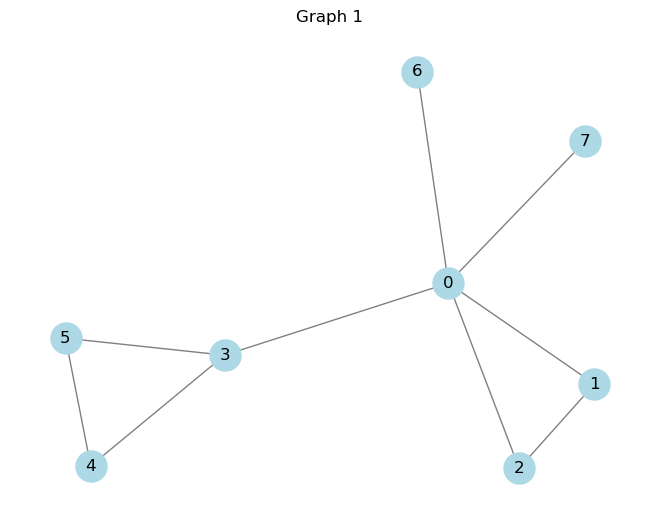

Graph 2: Edges: [(0, 1), (0, 2), (0, 3), (0, 7), (1, 2), (3, 4), (3, 6), (4, 5), (5, 6)]


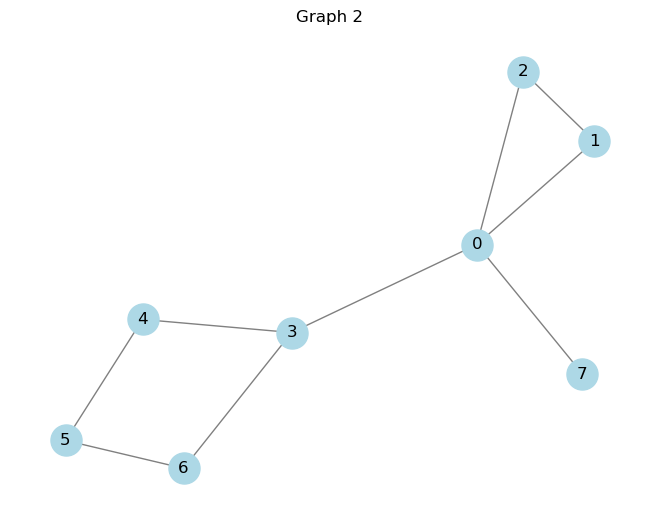

Graph 3: Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (3, 4), (3, 7), (4, 5), (5, 6), (6, 7)]


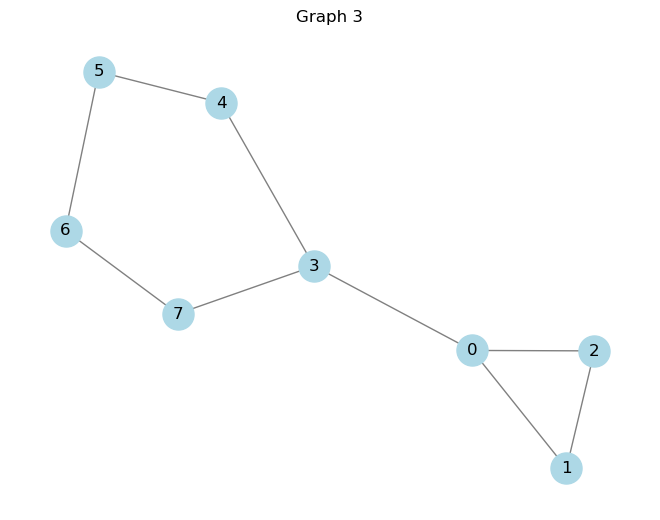

Graph 4: Edges: [(0, 1), (0, 3), (0, 4), (0, 7), (1, 2), (2, 3), (4, 5), (4, 6), (5, 6)]


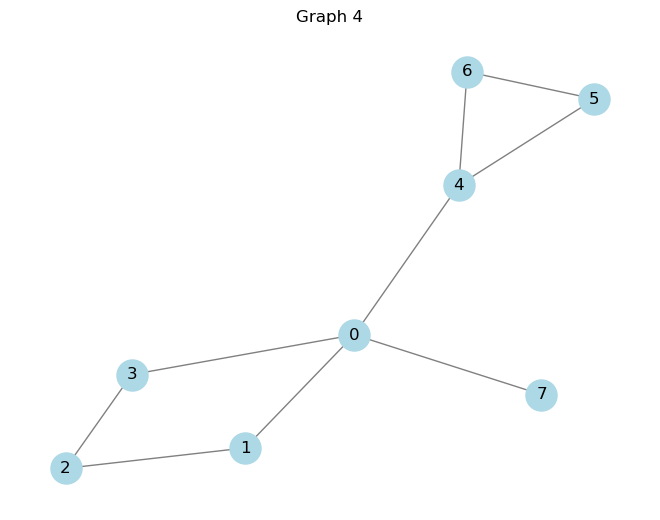

Graph 5: Edges: [(0, 1), (0, 3), (0, 4), (1, 2), (2, 3), (4, 5), (4, 7), (5, 6), (6, 7)]


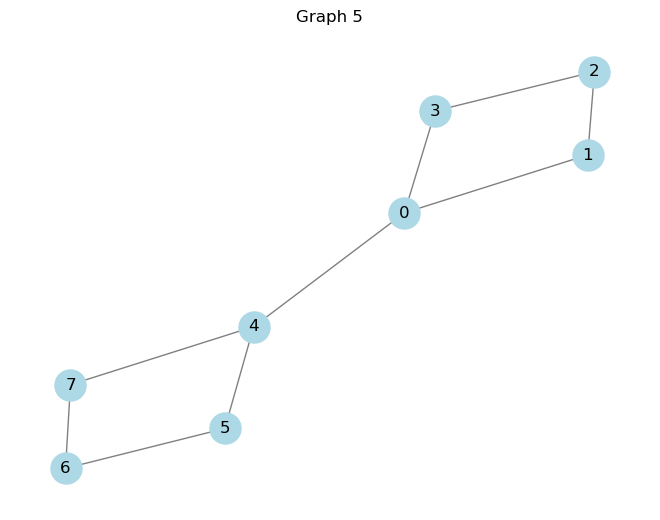

In [72]:
graphs_with_two_linked_cycles = generate_connected_graphs_with_two_linked_cycles(8)

print(f"Total unique connected graphs with two linked cycles: {len(graphs_with_two_linked_cycles)}")
for i, graph in enumerate(graphs_with_two_linked_cycles):
    print(f"Graph {i + 1}: Edges:", list(graph.edges()))
    plt.figure()
    nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
    plt.title(f"Graph {i + 1}")
    plt.show()

In [73]:
def bicycle_laplacian_integer_graph(n):
    graphs_with_two_cycles = generate_graphs_with_two_cycles(n)
    laplacian_graphs = [graph for graph in graphs_with_two_cycles if is_laplacian_integer_graph(graph)]

    print(f"Total graphs with two connected cycles: {len(graphs_with_two_cycles)}")
    print(f"Total Laplacian integer graphs found: {len(laplacian_graphs)}")

    for i, graph in enumerate(laplacian_graphs):
        print(f"Laplacian Graph {i + 1}:")
        print("Edges:", list(graph.edges()))
        plt.figure()
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, node_color='gold', node_size=750, edge_color='gray')
        plt.title(f"Laplacian Graph {i + 1}")
        plt.show()

In [74]:
bicycle_laplacian_integer_graph(8)

Total graphs with two connected cycles: 5
Total Laplacian integer graphs found: 0
